In [86]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

IMAGES_PATH = './plots'

def save_fig(fig_id: str, tight_layout: bool = True, fig_extension: str = "png", resolution: int = 200):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Reading data

In [55]:
file_names = [
    './history/scores_log_agent_gcnn_2023-04-28_16-54_test_5_intersection.csv',
    './history/scores_log_agent_gcnn_2023-04-30_22-20_test_5_intersection.csv',
    './history/scores_log_agent_gcnn_2023-05-03_12-22_test_5_intersection.csv'
]

agent_names = [x.split('_')[x.split('_').index('agent') + 1] for x in file_names]
agent_names = ['gcnn', 'enn', 'snn']

dfs = [pd.read_csv(name, sep='\t') for name in file_names]

for i,d in enumerate(dfs):
    d.columns = [f'{y}_{x}' for x, y in zip(np.tile(agent_names[i], len(d.columns)), d.columns)]

print(f'Agent names: {agent_names}')
print(f'Length of log files: {[len(x) for x in dfs]}')

Agent names: ['gcnn', 'enn', 'snn']
Length of log files: [1000, 1000, 1000]


In [81]:
df = pd.concat(dfs, axis=1)
df_window = df.loc[:, ['window' in x for x in df.columns]]
df_score = df.loc[:, ['scores' in x for x in df.columns]]

df_window.columns = [x.removeprefix('window_') for x in df_window.columns]
df_score.columns = [x.removeprefix('score_') for x in df_score.columns]

df_window = pd.melt(df_window, ignore_index=False)
df_score = pd.melt(df_score, ignore_index=False)

## Scores

Saving figure windowed_scores_comparison


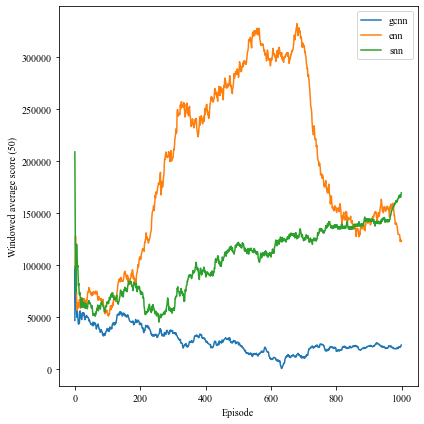

In [87]:
plt.figure(figsize=(6,6))
sns.lineplot(x=df_window.index, y=df_window.value, hue=df_window.variable)
plt.xlabel('Episode')
plt.ylabel('Windowed average score (50)')
plt.legend(loc='best')
save_fig('windowed_scores_comparison')
plt.show()